# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 5 submission</b></u>

### Roster Name: Austin Rivard
### Preferred Name (if different):
### Student ID: 015044445
### Email address: austin.rivard@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
np.random.seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Code the solution

In [4]:
# 1. Load the data. 

filepath = '/content/drive/My Drive/Colab Notebooks/homework5_input_data.csv'
df = pd.read_csv(filepath)

df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

X.shape, Y.shape

((103594, 22), (103594,))

In [6]:
# 2. Convert categorical variables to numeric format

categorical_labels = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
X1 = X.loc[:, categorical_labels]
X2 = X.drop(categorical_labels, axis=1)

X1_numeric = pd.get_dummies(X1, columns=X1.columns, prefix=X1.columns)
X1_numeric.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0
2,1,0,1,0,1,0,1,0,0
3,1,0,1,0,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0


In [7]:
X = pd.concat([X1_numeric, X2], axis=1)
X.head()

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,Age,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,1,1,0,0,1,0,0,1,13,...,5,5,4,3,4,4,5,5,25,18.0
1,0,1,0,1,1,0,1,0,0,25,...,1,1,1,5,3,1,4,1,1,6.0
2,1,0,1,0,1,0,1,0,0,26,...,5,5,4,3,4,4,4,5,0,0.0
3,1,0,1,0,1,0,1,0,0,25,...,2,2,2,5,3,1,4,2,11,9.0
4,0,1,1,0,1,0,1,0,0,61,...,5,3,3,4,4,3,3,3,0,0.0


In [8]:
# 3. Break the data into the training and test datasets.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((82875, 27), (82875,), (20719, 27), (20719,))

In [9]:
# 4. Train a decision tree model

model = DecisionTreeClassifier(random_state=0)

# Report five-fold cross-validation accuracies and mean accuracy
scores = cross_val_score(model, X_train, Y_train, cv=5)
print(f'cross validation scores: {scores}')
print(f'mean cross-validation score: {np.mean(scores):.2f}')

cross validation scores: [0.94322775 0.94220211 0.94413273 0.94582202 0.94328808]
mean cross-validation score: 0.94


In [10]:
# 5. Train a decision tree model on all the training data

model.fit(X_train, Y_train)

# Report prediction accuracy on the test data

print(f'model accuracy on test data: {model.score(X_test, Y_test):.2f}')

model accuracy on test data: 0.95


Text(0.5, 1.0, 'Normalized confusion matrix')

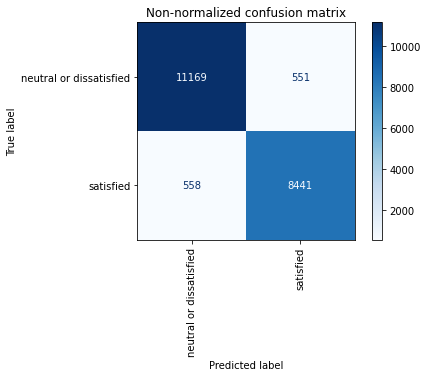

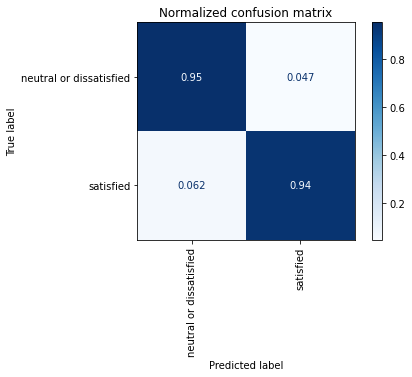

In [11]:
# 6. Plot two confusion matrices for test set predictions (one non-normalized and one normalized).

# non-normalized
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test,
                                      cmap=plt.cm.Blues,
                                      xticks_rotation='vertical',
                                      normalize=None).ax_.set_title('Non-normalized confusion matrix')

# normalized
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test,
                                      cmap=plt.cm.Blues,
                                      xticks_rotation='vertical',
                                      normalize='true').ax_.set_title('Normalized confusion matrix')